/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.7754 - loss: 0.7687 - val_accuracy: 0.8271 - val_loss: 0.4091
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8269 - loss: 0.4186 - val_accuracy: 0.9181 - val_loss: 0.2684
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.8735 - loss: 0.2927 - val_accuracy: 0.9381 - val_loss: 0.2032
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9128 - loss: 0.2072 - val_accuracy: 0.9054 - val_loss: 0.1893
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9227 - loss: 0.1610 - val_accuracy: 0.9480 - val_loss: 0.1813
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9385 - loss: 0.1216 - val_accuracy: 0.9542 - val_loss: 0.1896
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 47s 87ms/step - accuracy: 0.9460 - loss: 0.1059 - val_accuracy: 0.9597 - val_loss: 0.1961
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9468 - loss: 0.1028 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-art       0.02      0.26      0.04        38
       B-eve       0.10      0.52      0.17        48
       B-geo       0.71      0.80      0.75      3720
       B-gpe       0.93      0.89      0.91      1651
       B-nat       0.07      0.67      0.13        18
       B-org       0.36      0.60      0.45      1908
       B-per       0.66      0.80      0.72      1731
       B-tim       0.49      0.88      0.63      2051
       I-art       0.01      0.16      0.01        19
       I-eve       0.08      0.42      0.13        36
       I-geo       0.35      0.74      0.48       796
       I-gpe       0.04      0.43      0.08        28
       I-nat       0.02      0.43      0.04         7
       I-org       0.22      0.70      0.33      1629
       I-per       0.66      0.82      0.73      1831
       I-tim       0.21      0.84      0.33       689
           O       0.99      0.85      0.91     89147
         PAD       0.00    

<Figure size 1200x1200 with 0 Axes>

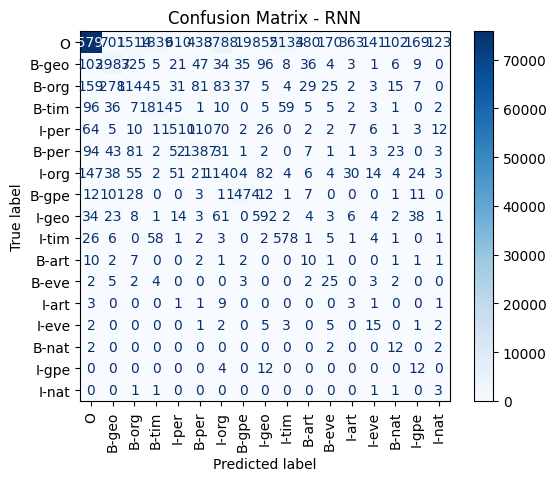

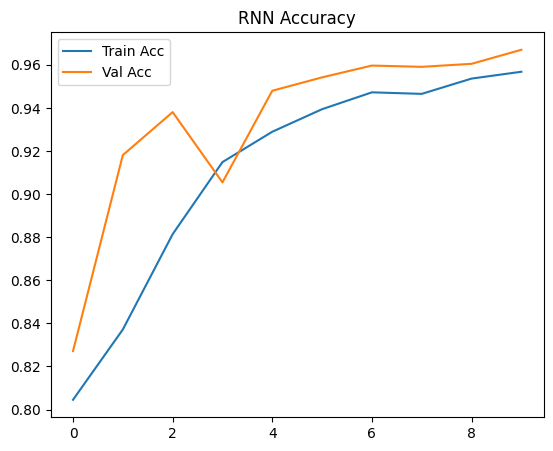

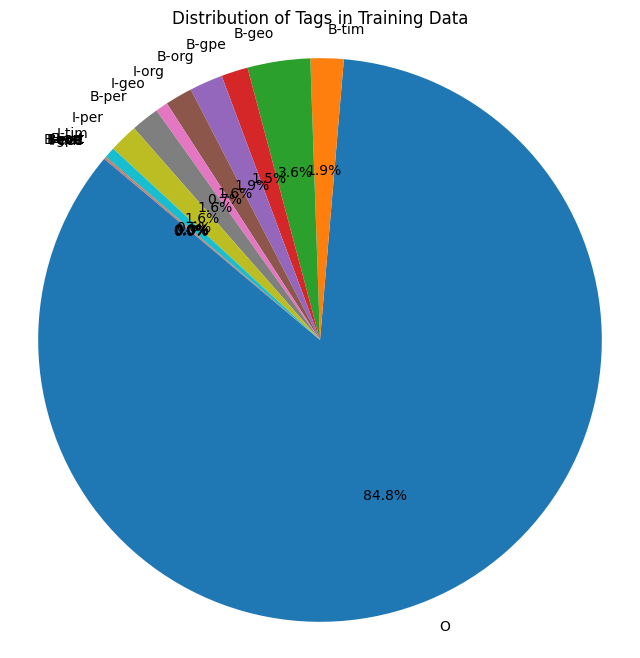

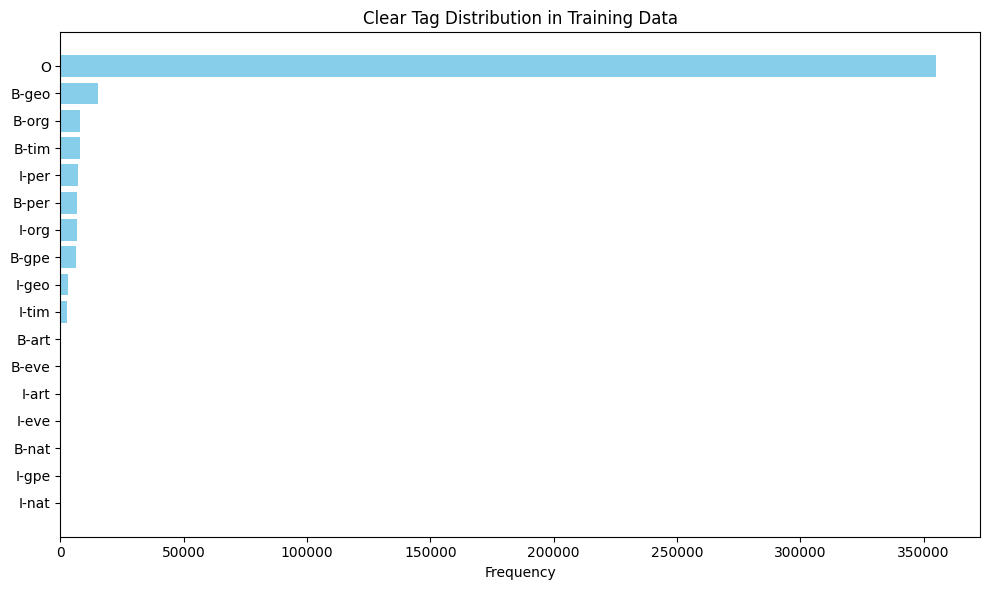

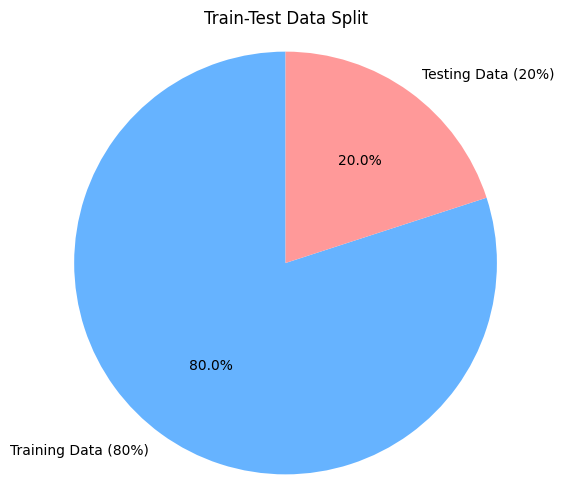

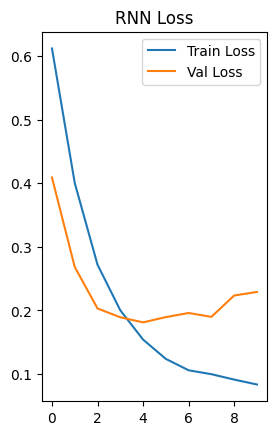

In [4]:
# RNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, TimeDistributed
import tensorflow.keras.backend as K

# --- Load Dataset ---
train_df = pd.read_csv("/content/Dataset_A_Tag_train.csv")
test_df = pd.read_csv("/content/Dataset_A_Tag_test.csv")

train_df['Tag'] = train_df['Tag'].apply(ast.literal_eval)
train_df['Sentence'] = train_df['Sentence'].apply(lambda x: x.split())
test_df['Tag'] = test_df['Tag'].apply(ast.literal_eval)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: x.split())

# --- Tokenization ---
word_tokenizer = Tokenizer(oov_token="OOV")
word_tokenizer.fit_on_texts(train_df['Sentence'])

tag_tokenizer = Tokenizer(lower=False)
tag_tokenizer.fit_on_texts(train_df['Tag'])

X_train = word_tokenizer.texts_to_sequences(train_df['Sentence'])
X_test = word_tokenizer.texts_to_sequences(test_df['Sentence'])
y_train = tag_tokenizer.texts_to_sequences(train_df['Tag'])
y_test = tag_tokenizer.texts_to_sequences(test_df['Tag'])

# --- Padding ---
max_len = max(max(len(s) for s in X_train), max(len(s) for s in X_test))
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
y_test = pad_sequences(y_test, padding='post', maxlen=max_len)

# --- One-hot encode ---
num_tags = len(tag_tokenizer.word_index) + 1
y_train_oh = to_categorical(y_train, num_classes=num_tags)
y_test_oh = to_categorical(y_test, num_classes=num_tags)

# --- Class weights ---
flat_tags = [i for row in y_train for i in row if i != 0]
counter = Counter(flat_tags)
total = sum(counter.values())
class_weights = {i: total / (len(counter) * count) for i, count in counter.items()}

weight_vector = np.ones(num_tags)
for tag_idx, weight in class_weights.items():
    weight_vector[tag_idx] = weight

def weighted_categorical_crossentropy(weights):
    weights = K.variable(weights)
    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        loss_val = y_true * K.log(y_pred) * weights
        return -K.sum(loss_val, -1)
    return loss

# --- RNN Model (no early stopping) ---
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=len(word_tokenizer.word_index)+1, output_dim=64, input_length=max_len))
rnn_model.add(Dropout(0.5))  # Stronger regularization
rnn_model.add(SimpleRNN(units=64, return_sequences=True))
rnn_model.add(Dropout(0.5))
rnn_model.add(TimeDistributed(Dense(num_tags, activation='softmax')))

rnn_model.compile(optimizer='adam',
                  loss=weighted_categorical_crossentropy(weight_vector),
                  metrics=['accuracy'])

rnn_model.summary()

# --- Fit Model (no callbacks) ---
history_rnn = rnn_model.fit(
    X_train, y_train_oh,
    batch_size=32,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# --- Prediction ---
y_pred_rnn = rnn_model.predict(X_test)
y_pred_rnn_labels = np.argmax(y_pred_rnn, axis=-1)
y_true_rnn_labels = np.argmax(y_test_oh, axis=-1)

# --- Decoding Labels ---
inv_tags = {v: k for k, v in tag_tokenizer.word_index.items()}
inv_tags[0] = "PAD"

flat_pred_rnn = [inv_tags.get(i, 'O') for row in y_pred_rnn_labels for i in row]
flat_true_rnn = [inv_tags.get(i, 'O') for row in y_true_rnn_labels for i in row]

filtered_true = [t for t, p in zip(flat_true_rnn, flat_pred_rnn) if t != 'PAD']
filtered_pred = [p for t, p in zip(flat_true_rnn, flat_pred_rnn) if t != 'PAD']

# --- Metrics ---
print("RNN Accuracy:", accuracy_score(filtered_true, filtered_pred))
print("RNN F1 Score (macro):", f1_score(filtered_true, filtered_pred, average='macro'))
print("Classification Report:")
print(classification_report(filtered_true, filtered_pred))

# --- Confusion Matrix ---
labels = list(tag_tokenizer.word_index.keys())
cm = confusion_matrix(filtered_true, filtered_pred, labels=labels)
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix - RNN")
plt.show()

# --- Plot Accuracy & Loss ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Train Acc')
plt.plot(history_rnn.history['val_accuracy'], label='Val Acc')
plt.title("RNN Accuracy")
plt.legend()
tag_counts = Counter([tag for row in y_train for tag in row if tag != 0])
tag_labels = [inv_tags[i] for i in tag_counts.keys()]
tag_values = list(tag_counts.values())

# --- Original Pie Chart ---
plt.figure(figsize=(8, 8))
plt.pie(tag_values, labels=tag_labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Tags in Training Data")
plt.axis('equal')
plt.show()

# --- Added Clearer Horizontal Bar Chart ---
# Sorted tag frequency display
sorted_pairs = sorted(zip(tag_labels, tag_values), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_values = zip(*sorted_pairs)

plt.figure(figsize=(10, 6))
plt.barh(sorted_labels, sorted_values, color='skyblue')
plt.xlabel("Frequency")
plt.title("Clear Tag Distribution in Training Data")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Pie Chart: Train-Test Split ---
plt.figure(figsize=(6, 6))
sizes = [len(train_df), len(test_df)]
labels = ['Training Data (80%)', 'Testing Data (20%)']
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Train-Test Data Split")
plt.axis('equal')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.title("RNN Loss")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 135s 230ms/step - accuracy: 0.7906 - loss: 0.7202 - val_accuracy: 0.8565 - val_loss: 0.3807
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 138s 223ms/step - accuracy: 0.8690 - loss: 0.3939 - val_accuracy: 0.9465 - val_loss: 0.2402
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 123s 227ms/step - accuracy: 0.9346 - loss: 0.2277 - val_accuracy: 0.9667 - val_loss: 0.2265
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 141s 224ms/step - accuracy: 0.9562 - loss: 0.1362 - val_accuracy: 0.9595 - val_loss: 0.2052
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 142s 224ms/step - accuracy: 0.9629 - loss: 0.1008 - val_accuracy: 0.9658 - val_loss: 0.2399
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 141s 221ms/step - accuracy: 0.9676 - loss: 0.0726 - val_accuracy: 0.9676 - val_loss: 0.2191
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 119s 220ms/step - accuracy: 0.9704 - loss: 0.0629 - val_accuracy: 0.9720 - val_loss: 0.2504
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 142s 221ms/step - accuracy: 0.9727 -

<Figure size 1200x1200 with 0 Axes>

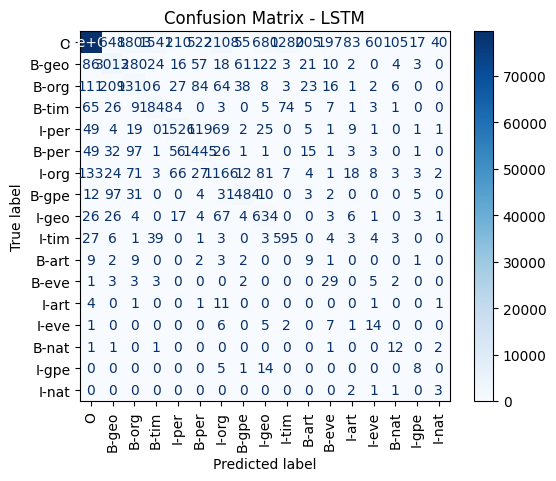

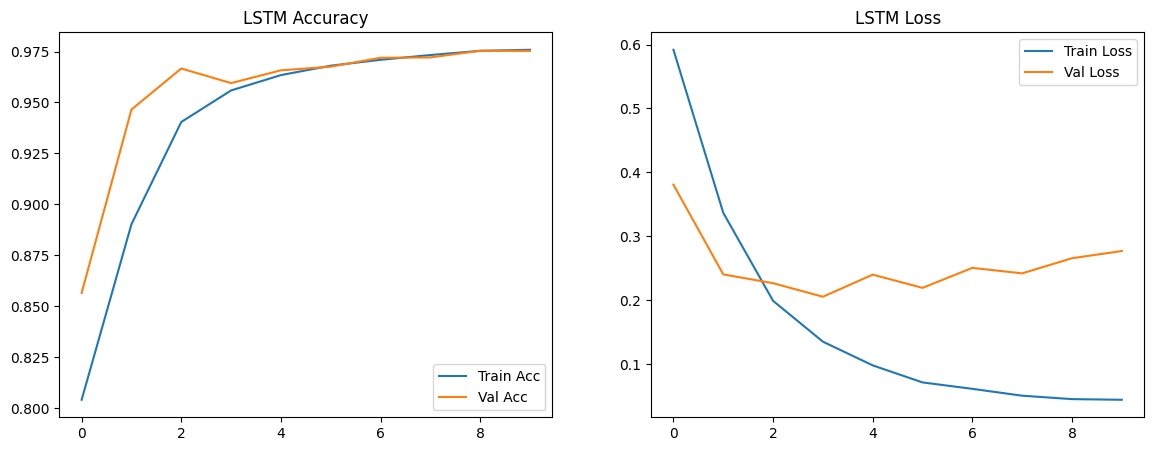

In [ ]:
#Lstm model
# --- 1. Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, TimeDistributed
import tensorflow.keras.backend as K

# --- 2. Load and Preprocess ---
train_df = pd.read_csv("/content/Dataset_A_Tag_train.csv")
test_df = pd.read_csv("/content/Dataset_A_Tag_test.csv")

# Convert string representation of lists to actual lists
train_df['Tag'] = train_df['Tag'].apply(ast.literal_eval)
train_df['Sentence'] = train_df['Sentence'].apply(lambda x: x.split())
test_df['Tag'] = test_df['Tag'].apply(ast.literal_eval)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: x.split())

# --- 3. Tokenize ---
word_tokenizer = Tokenizer(oov_token="OOV")
word_tokenizer.fit_on_texts(train_df['Sentence'])

tag_tokenizer = Tokenizer(lower=False)
tag_tokenizer.fit_on_texts(train_df['Tag'])

# Convert to sequences
X_train = word_tokenizer.texts_to_sequences(train_df['Sentence'])
X_test = word_tokenizer.texts_to_sequences(test_df['Sentence'])
y_train = tag_tokenizer.texts_to_sequences(train_df['Tag'])
y_test = tag_tokenizer.texts_to_sequences(test_df['Tag'])

# --- 4. Padding ---
max_len = max(max(len(s) for s in X_train), max(len(s) for s in X_test))
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
y_test = pad_sequences(y_test, padding='post', maxlen=max_len)

# --- 5. One-hot encode tags ---
num_tags = len(tag_tokenizer.word_index) + 1
y_train_oh = to_categorical(y_train, num_classes=num_tags)
y_test_oh = to_categorical(y_test, num_classes=num_tags)

# --- 6. Class Weights ---
flat_tags = [i for row in y_train for i in row if i != 0]
counter = Counter(flat_tags)
total = sum(counter.values())
class_weights = {i: total / (len(counter) * count) for i, count in counter.items()}

weight_vector = np.ones(num_tags)
for tag_idx, weight in class_weights.items():
    weight_vector[tag_idx] = weight

def weighted_categorical_crossentropy(weights):
    weights = K.variable(weights)
    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        loss_val = y_true * K.log(y_pred) * weights
        return -K.sum(loss_val, -1)
    return loss

# --- 7. Define LSTM Model ---
from tensorflow.keras.layers import Bidirectional

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(word_tokenizer.word_index)+1, output_dim=64, input_length=max_len))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
lstm_model.add(Dropout(0.3))
lstm_model.add(TimeDistributed(Dense(num_tags, activation='softmax')))

lstm_model.compile(optimizer='adam',
                   loss=weighted_categorical_crossentropy(weight_vector),
                   metrics=['accuracy'])

lstm_model.summary()

# --- 8. Train without EarlyStopping (but limit overfitting) ---
history_lstm = lstm_model.fit(
    X_train, y_train_oh,
    batch_size=32,
    epochs=10,               # Adjust as needed
    validation_split=0.1,
    verbose=1
)

# --- 9. Predict and Evaluate ---
y_pred_lstm = lstm_model.predict(X_test)
y_pred_labels = np.argmax(y_pred_lstm, axis=-1)
y_true_labels = np.argmax(y_test_oh, axis=-1)

inv_tags = {v: k for k, v in tag_tokenizer.word_index.items()}
inv_tags[0] = "PAD"

flat_pred = [inv_tags.get(i, 'O') for row in y_pred_labels for i in row]
flat_true = [inv_tags.get(i, 'O') for row in y_true_labels for i in row]

filtered_true = [t for t, p in zip(flat_true, flat_pred) if t != 'PAD']
filtered_pred = [p for t, p in zip(flat_true, flat_pred) if t != 'PAD']

print("LSTM Accuracy:", accuracy_score(filtered_true, filtered_pred))
print("LSTM F1 Score (macro):", f1_score(filtered_true, filtered_pred, average='macro'))
print("Classification Report:")
print(classification_report(filtered_true, filtered_pred))

# --- 10. Confusion Matrix ---
labels = list(tag_tokenizer.word_index.keys())
cm = confusion_matrix(filtered_true, filtered_pred, labels=labels)
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix - LSTM")
plt.show()

# --- 11. Accuracy & Loss Plot ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title("LSTM Loss")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 201s 346ms/step - accuracy: 0.7847 - loss: 0.7265 - val_accuracy: 0.7992 - val_loss: 0.4751
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 181s 335ms/step - accuracy: 0.8094 - loss: 0.4980 - val_accuracy: 0.8833 - val_loss: 0.3177
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 203s 336ms/step - accuracy: 0.8788 - loss: 0.2700 - val_accuracy: 0.9255 - val_loss: 0.2681
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 184s 340ms/step - accuracy: 0.9215 - loss: 0.1721 - val_accuracy: 0.9491 - val_loss: 0.2684
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 202s 340ms/step - accuracy: 0.9443 - loss: 0.1226 - val_accuracy: 0.9596 - val_loss: 0.2760
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 202s 340ms/step - accuracy: 0.9539 - loss: 0.1005 - val_accuracy: 0.9634 - val_loss: 0.3149
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 203s 342ms/step - accuracy: 0.9606 - loss: 0.0806 - val_accuracy: 0.9647 - val_loss: 0.3357
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 203s 344ms/step - accuracy: 0.9650 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-art       0.01      0.18      0.03        38
       B-eve       0.14      0.58      0.22        48
       B-geo       0.67      0.83      0.74      3720
       B-gpe       0.84      0.90      0.87      1651
       B-nat       0.05      0.56      0.08        18
       B-org       0.43      0.63      0.51      1908
       B-per       0.63      0.82      0.71      1731
       B-tim       0.47      0.89      0.62      2051
       I-art       0.00      0.05      0.01        19
       I-eve       0.08      0.42      0.14        36
       I-geo       0.36      0.77      0.49       796
       I-gpe       0.05      0.29      0.08        28
       I-nat       0.07      0.43      0.11         7
       I-org       0.36      0.65      0.46      1629
       I-per       0.67      0.83      0.74      1831
       I-tim       0.20      0.84      0.32       689
           O       0.99      0.87      0.93     89147
         PAD       0.00    

<Figure size 1200x1200 with 0 Axes>

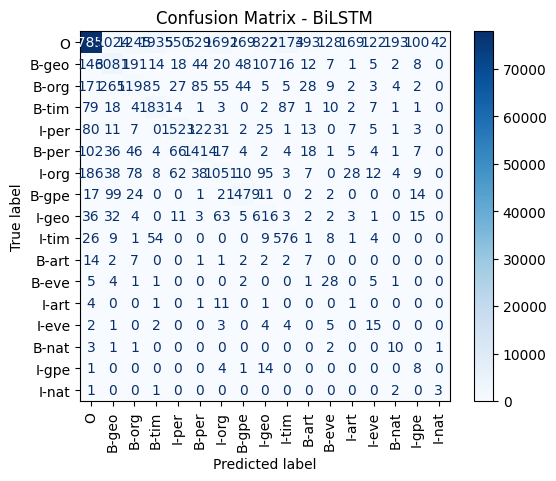

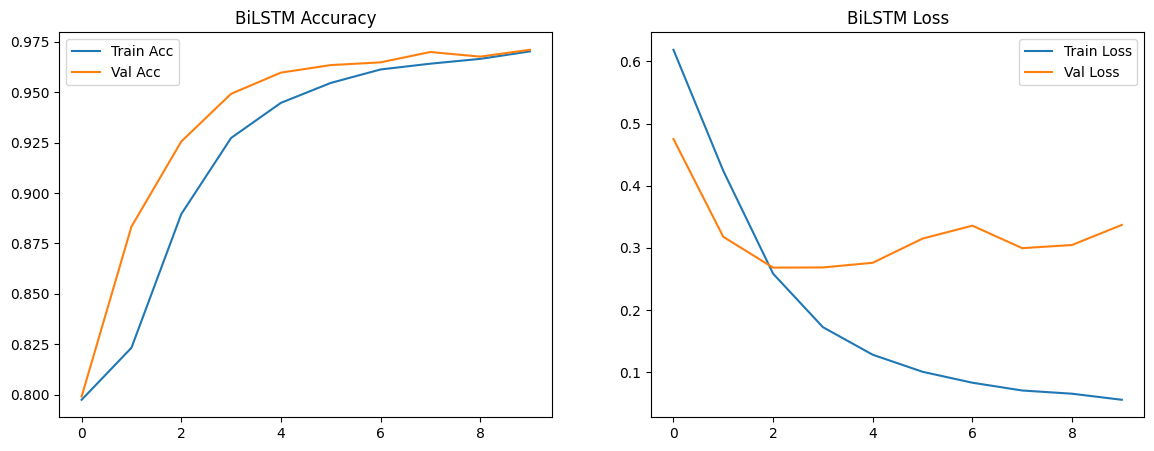

In [ ]:
#bi lstm

# --- 1. Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, TimeDistributed, Bidirectional
import tensorflow.keras.backend as K

# --- 2. Load and Preprocess ---
train_df = pd.read_csv("/content/Dataset_A_Tag_train.csv")
test_df = pd.read_csv("/content/Dataset_A_Tag_test.csv")

train_df['Tag'] = train_df['Tag'].apply(ast.literal_eval)
train_df['Sentence'] = train_df['Sentence'].apply(lambda x: x.split())
test_df['Tag'] = test_df['Tag'].apply(ast.literal_eval)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: x.split())

# --- 3. Tokenize ---
word_tokenizer = Tokenizer(oov_token="OOV")
word_tokenizer.fit_on_texts(train_df['Sentence'])

tag_tokenizer = Tokenizer(lower=False)
tag_tokenizer.fit_on_texts(train_df['Tag'])

X_train = word_tokenizer.texts_to_sequences(train_df['Sentence'])
X_test = word_tokenizer.texts_to_sequences(test_df['Sentence'])
y_train = tag_tokenizer.texts_to_sequences(train_df['Tag'])
y_test = tag_tokenizer.texts_to_sequences(test_df['Tag'])

# --- 4. Padding ---
max_len = max(max(len(s) for s in X_train), max(len(s) for s in X_test))
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
y_test = pad_sequences(y_test, padding='post', maxlen=max_len)

# --- 5. One-hot encode tags ---
num_tags = len(tag_tokenizer.word_index) + 1
y_train_oh = to_categorical(y_train, num_classes=num_tags)
y_test_oh = to_categorical(y_test, num_classes=num_tags)

# --- 6. Class Weights ---
flat_tags = [i for row in y_train for i in row if i != 0]
counter = Counter(flat_tags)
total = sum(counter.values())
class_weights = {i: total / (len(counter) * count) for i, count in counter.items()}

weight_vector = np.ones(num_tags)
for tag_idx, weight in class_weights.items():
    weight_vector[tag_idx] = weight

def weighted_categorical_crossentropy(weights):
    weights = K.variable(weights)
    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        loss_val = y_true * K.log(y_pred) * weights
        return -K.sum(loss_val, -1)
    return loss

# --- 7. Define BiLSTM Model ---
bi_lstm_model = Sequential()
bi_lstm_model.add(Embedding(input_dim=len(word_tokenizer.word_index)+1, output_dim=64, input_length=max_len))
bi_lstm_model.add(Dropout(0.3))
bi_lstm_model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
bi_lstm_model.add(Dropout(0.3))
bi_lstm_model.add(Bidirectional(LSTM(units=64, return_sequences=True)))  # Added a second BiLSTM layer
bi_lstm_model.add(Dropout(0.3))
bi_lstm_model.add(TimeDistributed(Dense(num_tags, activation='softmax')))

bi_lstm_model.compile(optimizer='adam',
                      loss=weighted_categorical_crossentropy(weight_vector),
                      metrics=['accuracy'])

bi_lstm_model.summary()

# --- 8. Train ---
history_bilstm = bi_lstm_model.fit(
    X_train, y_train_oh,
    batch_size=32,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# --- 9. Predict and Evaluate ---
y_pred_bilstm = bi_lstm_model.predict(X_test)
y_pred_labels = np.argmax(y_pred_bilstm, axis=-1)
y_true_labels = np.argmax(y_test_oh, axis=-1)

inv_tags = {v: k for k, v in tag_tokenizer.word_index.items()}
inv_tags[0] = "PAD"

flat_pred = [inv_tags.get(i, 'O') for row in y_pred_labels for i in row]
flat_true = [inv_tags.get(i, 'O') for row in y_true_labels for i in row]

filtered_true = [t for t, p in zip(flat_true, flat_pred) if t != 'PAD']
filtered_pred = [p for t, p in zip(flat_true, flat_pred) if t != 'PAD']

print("BiLSTM Accuracy:", accuracy_score(filtered_true, filtered_pred))
print("BiLSTM F1 Score (macro):", f1_score(filtered_true, filtered_pred, average='macro'))
print("Classification Report:")
print(classification_report(filtered_true, filtered_pred))

# --- 10. Confusion Matrix ---
labels = list(tag_tokenizer.word_index.keys())
cm = confusion_matrix(filtered_true, filtered_pred, labels=labels)
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix - BiLSTM")
plt.show()

# --- 11. Accuracy & Loss Plot ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['accuracy'], label='Train Acc')
plt.plot(history_bilstm.history['val_accuracy'], label='Val Acc')
plt.title("BiLSTM Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Val Loss')
plt.title("BiLSTM Loss")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.8007 - loss: 0.7397 - val_accuracy: 0.9422 - val_loss: 0.2823
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 68s 126ms/step - accuracy: 0.9385 - loss: 0.2888 - val_accuracy: 0.9608 - val_loss: 0.2012
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9569 - loss: 0.1657 - val_accuracy: 0.9632 - val_loss: 0.1825
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 81s 126ms/step - accuracy: 0.9637 - loss: 0.1206 - val_accuracy: 0.9647 - val_loss: 0.1803
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 68s 126ms/step - accuracy: 0.9660 - loss: 0.1029 - val_accuracy: 0.9691 - val_loss: 0.1970
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 69s 127ms/step - accuracy: 0.9687 - loss: 0.0795 - val_accuracy: 0.9651 - val_loss: 0.1926
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 80s 125ms/step - accuracy: 0.9703 - loss: 0.0668 - val_accuracy: 0.9698 - val_loss: 0.2068
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 84s 128ms/step - accuracy: 0.9721 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       B-art       0.02      0.32      0.04        38
       B-eve       0.05      0.58      0.10        48
       B-geo       0.73      0.78      0.76      3720
       B-gpe       0.92      0.89      0.91      1651
       B-nat       0.05      0.67      0.09        18
       B-org       0.32      0.63      0.43      1908
       B-per       0.63      0.82      0.71      1731
       B-tim       0.49      0.88      0.63      2051
       I-art       0.01      0.32      0.02        19
       I-eve       0.09      0.61      0.16        36
       I-geo       0.44      0.74      0.56       796
       I-gpe       0.06      0.32      0.10        28
       I-nat       0.02      0.43      0.04         7
       I-org       0.31      0.68      0.43      1629
       I-per       0.77      0.85      0.81      1831
       I-tim       0.24      0.85      0.38       689
           O       0.99      0.87      0.93     89147
         PAD       0.00    

<Figure size 1200x1200 with 0 Axes>

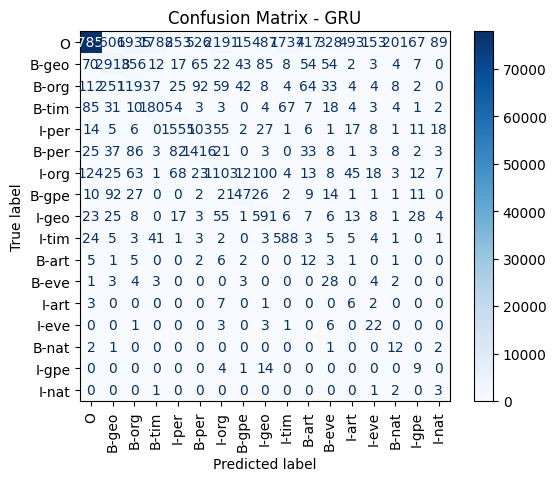

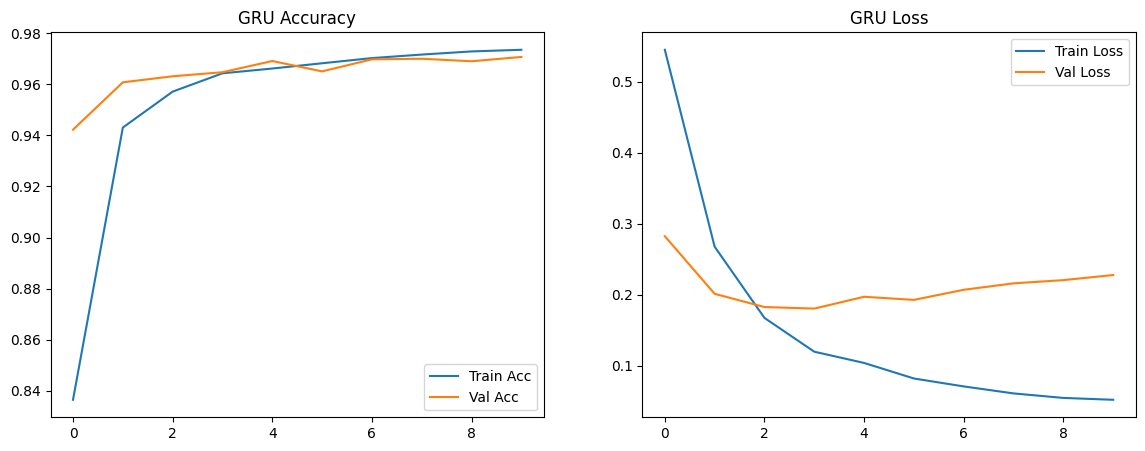

In [ ]:
# --- 1. Imports ---
#GRU Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU, TimeDistributed
import tensorflow.keras.backend as K

# --- 2. Load and Preprocess ---
train_df = pd.read_csv("/content/Dataset_A_Tag_train.csv")
test_df = pd.read_csv("/content/Dataset_A_Tag_test.csv")

# Convert string representation of lists to actual lists
train_df['Tag'] = train_df['Tag'].apply(ast.literal_eval)
train_df['Sentence'] = train_df['Sentence'].apply(lambda x: x.split())
test_df['Tag'] = test_df['Tag'].apply(ast.literal_eval)
test_df['Sentence'] = test_df['Sentence'].apply(lambda x: x.split())

# --- 3. Tokenize ---
word_tokenizer = Tokenizer(oov_token="OOV")
word_tokenizer.fit_on_texts(train_df['Sentence'])

tag_tokenizer = Tokenizer(lower=False)
tag_tokenizer.fit_on_texts(train_df['Tag'])

# Convert to sequences
X_train = word_tokenizer.texts_to_sequences(train_df['Sentence'])
X_test = word_tokenizer.texts_to_sequences(test_df['Sentence'])
y_train = tag_tokenizer.texts_to_sequences(train_df['Tag'])
y_test = tag_tokenizer.texts_to_sequences(test_df['Tag'])

# --- 4. Padding ---
max_len = max(max(len(s) for s in X_train), max(len(s) for s in X_test))
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
y_test = pad_sequences(y_test, padding='post', maxlen=max_len)

# --- 5. One-hot encode tags ---
num_tags = len(tag_tokenizer.word_index) + 1
y_train_oh = to_categorical(y_train, num_classes=num_tags)
y_test_oh = to_categorical(y_test, num_classes=num_tags)

# --- 6. Class Weights ---
flat_tags = [i for row in y_train for i in row if i != 0]
counter = Counter(flat_tags)
total = sum(counter.values())
class_weights = {i: total / (len(counter) * count) for i, count in counter.items()}

weight_vector = np.ones(num_tags)
for tag_idx, weight in class_weights.items():
    weight_vector[tag_idx] = weight

def weighted_categorical_crossentropy(weights):
    weights = K.variable(weights)
    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        loss_val = y_true * K.log(y_pred) * weights
        return -K.sum(loss_val, -1)
    return loss

# --- 7. Define GRU Model ---
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(word_tokenizer.word_index)+1, output_dim=64, input_length=max_len))
gru_model.add(Dropout(0.3))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.3))
gru_model.add(TimeDistributed(Dense(num_tags, activation='softmax')))

gru_model.compile(optimizer='adam',
                  loss=weighted_categorical_crossentropy(weight_vector),
                  metrics=['accuracy'])

gru_model.summary()

# --- 8. Train GRU without EarlyStopping (limit overfitting) ---
history_gru = gru_model.fit(
    X_train, y_train_oh,
    batch_size=32,
    epochs=10,               # Adjust as needed
    validation_split=0.1,
    verbose=1
)

# --- 9. Predict and Evaluate GRU ---
y_pred_gru = gru_model.predict(X_test)
y_pred_labels_gru = np.argmax(y_pred_gru, axis=-1)
y_true_labels_gru = np.argmax(y_test_oh, axis=-1)

inv_tags = {v: k for k, v in tag_tokenizer.word_index.items()}
inv_tags[0] = "PAD"

flat_pred_gru = [inv_tags.get(i, 'O') for row in y_pred_labels_gru for i in row]
flat_true_gru = [inv_tags.get(i, 'O') for row in y_true_labels_gru for i in row]

filtered_true_gru = [t for t, p in zip(flat_true_gru, flat_pred_gru) if t != 'PAD']
filtered_pred_gru = [p for t, p in zip(flat_true_gru, flat_pred_gru) if t != 'PAD']

print("GRU Accuracy:", accuracy_score(filtered_true_gru, filtered_pred_gru))
print("GRU F1 Score (macro):", f1_score(filtered_true_gru, filtered_pred_gru, average='macro'))
print("Classification Report:")
print(classification_report(filtered_true_gru, filtered_pred_gru))

# --- 10. Confusion Matrix for GRU ---
labels = list(tag_tokenizer.word_index.keys())
cm_gru = confusion_matrix(filtered_true_gru, filtered_pred_gru, labels=labels)
plt.figure(figsize=(12, 12))
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru, display_labels=labels)
disp_gru.plot(xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix - GRU")
plt.show()

# --- 11. Accuracy & Loss Plot for GRU ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Acc')
plt.plot(history_gru.history['val_accuracy'], label='Val Acc')
plt.title("GRU Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title("GRU Loss")
plt.legend()
plt.show()
